# Loading Libraries

In [7]:
#Importing librariesabs
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors, DistanceMetric
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_distances

# Loading Data

In [8]:
#Loading data
movies = pd.read_csv('C:/Users/Bhavi/Desktop/Data Science/Data/Recommender System/movies.csv')
ratings = pd.read_csv('C:/Users/Bhavi/Desktop/Data Science/Data/Recommender System/ratings.csv')

In [9]:
#Checking the shape of the data
movies.shape, ratings.shape

((9742, 3), (100836, 4))

In [10]:
#Checking movie and ratings data
display(movies.head())
display(ratings.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Combining movies and rating

In [11]:
#Merge data based on movieid
data = pd.merge(movies, ratings, on='movieId')

# Creating pivot data between movie id and user id based on rating

In [12]:
#Creating pivot data between movie id and user id based on rating
final_data = data.pivot(index='movieId', columns= 'userId', values= 'rating')
final_data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Replacing NaN value with 0
final_data.fillna(0, inplace= True)
final_data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


# Computing number of user vote and movies vote

In [14]:
#Computing number of user vote and movies vote
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')
display(no_user_voted.head()) 
display(no_movies_voted.head())

movieId
1    215
2    110
3     52
4      7
5     49
Name: rating, dtype: int64

userId
1    232
2     29
3     39
4    216
5     44
Name: rating, dtype: int64

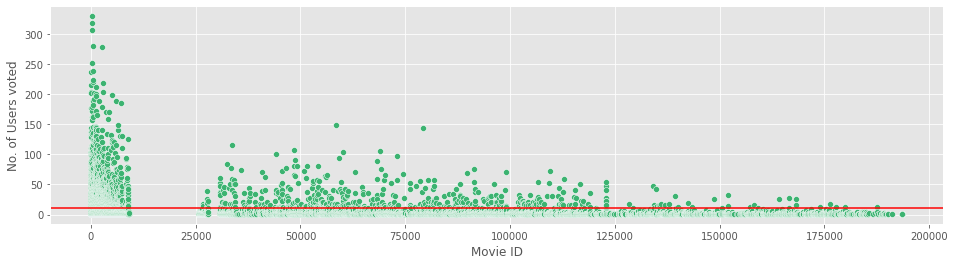

In [15]:
#Visualizing number of user vote
plt.style.use('ggplot')
plt.figure(figsize=(16,4))
plt.scatter(no_user_voted.index,
           no_user_voted,
           color = 'mediumseagreen',
           edgecolors='white')
plt.axhline(y=10, color = 'r')
plt.xlabel('Movie ID')
plt.ylabel('No. of Users voted')
plt.show()

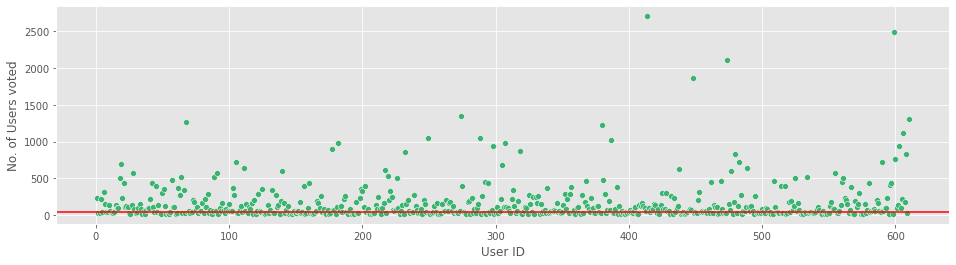

In [16]:
#Visualizing number of movie vote
plt.style.use('ggplot')
plt.figure(figsize=(16,4))
plt.scatter(no_movies_voted.index,
           no_movies_voted,
           color = 'mediumseagreen',
            edgecolors='white')
plt.axhline(y=50, color = 'r')
plt.xlabel('User ID')
plt.ylabel('No. of Users voted')
plt.show()

In [17]:
#Extracting the data where number of votes have greater than 10
final_data1 = final_data.loc[no_user_voted[no_user_voted>10].index,:]
final_data1

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Extracting the data where number of votes have greater than 50
final_data2 = final_data1.loc[:,no_movies_voted[no_movies_voted>50].index]
final_data2

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Computing sparsity by using example
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0-(np.count_nonzero(sample)/float(sample.size))
print(sparsity)

# It means how much percentage zero have in the data
# We have 15 data out which We have 11 zero and 4 non zero values
# Compute proportion of zero in the data = 11/15 i.e. Total zero count / Total Observation

0.7333333333333334


In [20]:
#Creating Compressed Sparse Row matrix
csr_sample = csr_matrix(sample)
print(csr_sample)

#Index - 0 1 2 3 4
# 0      0 0 3 0 0
# 1      4 0 0 0 2
# 2      0 0 0 0 1

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [21]:
#Creating Compressed Sparse Row matrix on final data
csr_data = csr_matrix(final_data2.values)

In [22]:
#Reset indexing on final data
final_data2.reset_index(inplace=True)

In [23]:
#Implementing knn
knn = NearestNeighbors(metric='cosine',
                      algorithm='brute',
                      n_neighbors=20,
                      n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [24]:
#Creating function for extracting movie recommendation
def get_movie_recommendation(movie_name):
    
    #1. Number of movies extract
    n_movies_to_recommend = 10 
    
    #2. Extracting a data based on key words
    movie_list = movies[movies['title'].str.contains(movie_name)] 
    
    if len(movie_list):
        #1. Selecting first movie from the movie_list
        movie_idx = movie_list.iloc[0]['movieId'] 
        
        movie_idx = final_data2[final_data2['movieId']==movie_idx].index[0]
        
        distances, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=n_movies_to_recommend+1)
        
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),
                                            distances.squeeze().tolist())),
                                   key=lambda x:x[1])[:0:-1]
        recommand_frame = []
        
        for val in rec_movie_indices:
            movie_idx = final_data2.iloc[val[0]]['movieId']
            idx = movies[movies['movieId']==movie_idx].index
            recommand_frame.append({'Title':movies.iloc[idx]['title'].values[0], 'Distance':val[1]})
        df = pd.DataFrame(recommand_frame, index=range(1,n_movies_to_recommend+1))
        return df
    else:
        return 'no movies found. Please check your input'

In [35]:
#Lets test the recommender system
get_movie_recommendation('Jumanji')
# I like jumanji movie very much so what other movies recommend ?

,Title,Distance
1,Casper (1995),0.474253
2,Stargate (1994),0.469654
3,"Nightmare Before Christmas, The (1993)",0.462612
4,Home Alone (1990),0.443432
5,Beauty and the Beast (1991),0.435007
6,Aladdin (1992),0.425428
7,Jurassic Park (1993),0.420563
8,Mrs. Doubtfire (1993),0.416164
9,"Mask, The (1994)",0.413743
10,"Lion King, The (1994)",0.377013
